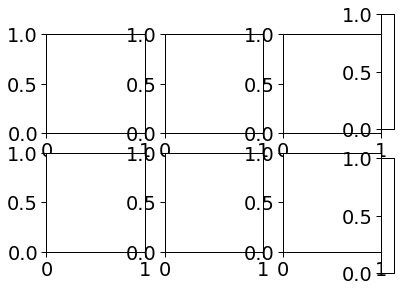

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import argparse
import numpy as np
import os
sns.set_context('paper', font_scale=2.2)

def get_mask(mean_V_loss):
    mask = np.where(mean_V_loss > 0.9, 1, 0)
    return mask

resume_paths = [
    "../log/MiniGrid-FourRooms-v0/dqn/ushape-9-1-7-utd0.06-epoch5/",
    "../log/MiniGrid-FourRooms-v0/tpdqn/ushape-9-1-7-utd0.06-epoch5/",
    "../log/MiniGrid-FourRooms-v0/tpdqn/oracle-Ushape/",
    "../log/MiniGrid-Maze-v0/dqn/epoch5utd0.06/",
    "../log/MiniGrid-Maze-v0/tpdqn/epoch5utd0.06/",
    "../log/MiniGrid-Maze-v0/tpdqn/oracle/",
]
annot_poses = [] * 3 + [(2,2), (2,0), (4,0), (6,0), (6,2), (4,2), (4,4), (4,6), (6,6), (2, 4)] * 3
ns = [ 31, 31, 31, 46, 46, 46]
titles = [ "Q loss(DQN)", "Q loss(TCE)", "Q loss(Oracle)"] * 2
cbars=[False, False, True] * 2
vranges = [(0.1, 0.5)] * 3 + [(0.2, 0.6)] * 3
fig, axs = plt.subplots(2, 3)
cbar_axs = [None, None, fig.add_axes([.9, .05, .03, .4]), None, None, fig.add_axes([.9, .55, .03, .4])]
cbar_axs[2].get_xaxis().set_visible(False)
cbar_axs[5].get_xaxis().set_visible(False)


In [2]:
index = -1
for resume_path, n, title, cbar, vrange, cbar_ax in zip(resume_paths, ns, titles, cbars, vranges, cbar_axs):
    index += 1
    ax = axs[index // 3][index % 3]
    all_V_loss = []
    for seed in os.listdir(resume_path):
        if seed.startswith("heatmap"):
            continue
        with open(os.path.join(resume_path, str(seed), "Q_tablepickle%d"%n), 'rb') as f:
            Q_table = pickle.load(f)
        print("Loaded Q table ", os.path.join(resume_path, "Q_tablepickle%d"%n))

        V_table = {}
        for key, value in zip(Q_table.keys(), Q_table.values()):
            V_table[key] = np.max(value)
        V_mean = np.average(list(V_table.values()))

        V_loss_table = []
        V_loss_linear = {}
        for i in range(14):
            V_loss_linear[i] = []
        for i in range(1, 8):
            this_loss = []
            for j in range(1, 8):
                # TODO: compute correct real_V
                real_V = 0.99 ** ((7-i) + (7-j))
                try:
                    loss = abs(V_table[(i,j)] - real_V)
                except KeyError:
                    # loss = abs(V_mean - real_V)
                    loss = 1
                this_loss.append(loss)
                V_loss_linear[14-i-j].append(loss)
            V_loss_table.append(this_loss)
        V_loss_table = np.array(V_loss_table)
        all_V_loss.append(V_loss_table)
    all_V_loss = np.array(all_V_loss)
    V_seed_mean = np.average(all_V_loss, axis=(1,2))
    mean_V_loss = np.average(all_V_loss[np.argsort(V_seed_mean)[:2]], axis=0)


    # ===========plot=============
    # fig, ax = plt.subplots()

    # frame = sns.heatmap(mean_V_loss, cmap="YlGnBu", vmin=0.1, vmax=0.5)
    # frame = sns.heatmap(mean_V_loss, cmap = 'RdBu_r', vmin=0.1, center=0.45, vmax=0.6, mask=get_mask(mean_V_loss), ax=ax, annot=False)
    annot = [["" for _ in range(7)] for _ in range(7)]
    for pos in [(2,2), (6,0), (4,2), (4,4), (6,6), (2, 4)]:
        annot[pos[0]][pos[1]] = str(round(mean_V_loss[pos], 2))
    frame = sns.heatmap(mean_V_loss, cmap = sns.color_palette("rocket_r", 20), vmin=0.1, vmax=0.6, 
                        mask=get_mask(mean_V_loss), ax=ax, annot=True, cbar=cbar, cbar_ax = cbar_ax)
    # frame.axes.get_xaxis().set_visible(False)
    # frame.axes.get_yaxis().set_visible(False)
    frame.set_facecolor("gray")
    # triangle = plt.imread('examples/minigrid/fig/triangle.png')
    # square = plt.imread('examples/minigrid/fig/square.png')
    # newax = fig.add_axes([0.65, 0.78, 0.1, 0.1])
    # newax.imshow(square)
    # newax.set_xticks([])
    # newax.set_yticks([])

    # newax2 = fig.add_axes([0.12, 0.78, 0.1, 0.1])
    # newax2.imshow(triangle)
    # newax2.set_xticks([])
    # newax2.set_yticks([])

    # =========save fig============
    ax.set_title(title)

Loaded Q table  ../log/MiniGrid-FourRooms-v0/dqn/ushape-9-1-7-utd0.06-epoch5/Q_tablepickle31
Loaded Q table  ../log/MiniGrid-FourRooms-v0/dqn/ushape-9-1-7-utd0.06-epoch5/Q_tablepickle31
Loaded Q table  ../log/MiniGrid-FourRooms-v0/dqn/ushape-9-1-7-utd0.06-epoch5/Q_tablepickle31
Loaded Q table  ../log/MiniGrid-FourRooms-v0/dqn/ushape-9-1-7-utd0.06-epoch5/Q_tablepickle31
Loaded Q table  ../log/MiniGrid-FourRooms-v0/dqn/ushape-9-1-7-utd0.06-epoch5/Q_tablepickle31
Loaded Q table  ../log/MiniGrid-FourRooms-v0/dqn/ushape-9-1-7-utd0.06-epoch5/Q_tablepickle31
Loaded Q table  ../log/MiniGrid-FourRooms-v0/dqn/ushape-9-1-7-utd0.06-epoch5/Q_tablepickle31
Loaded Q table  ../log/MiniGrid-FourRooms-v0/dqn/ushape-9-1-7-utd0.06-epoch5/Q_tablepickle31
Loaded Q table  ../log/MiniGrid-FourRooms-v0/dqn/ushape-9-1-7-utd0.06-epoch5/Q_tablepickle31
Loaded Q table  ../log/MiniGrid-FourRooms-v0/dqn/ushape-9-1-7-utd0.06-epoch5/Q_tablepickle31
Loaded Q table  ../log/MiniGrid-FourRooms-v0/dqn/ushape-9-1-7-utd0.06-

In [3]:
length=15
fig.set_size_inches(length*1.7, length)
fig.tight_layout(rect=[0, 0, .9, 1])
fig.savefig("gridworld-heatmap.png", bbox_inches = 'tight',
    pad_inches = 0)


<ipython-input-3-b797858bf67c>:3: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .9, 1])
